In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print()

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found")


City weather not found


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'},
  {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 29.71,
  'feels_like': 23.72,
  'temp_min': 25.74,
  'temp_max': 32.65,
  'pressure': 1022,
  'humidity': 86},
 'visibility': 805,
 'wind': {'speed': 5.75, 'deg': 20},
 'snow': {'1h': 1.22},
 'clouds': {'all': 100},
 'dt': 1644768482,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1644752619,
  'sunset': 1644790408},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1644752619,
 'sunset': 1644790408}

In [14]:
boston_data['dt']

1644768482

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 32.65 86 100 5.75


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | usinsk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | riyadh
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | dabou
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | nhulunbuy
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | ulcinj
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | vieux-habitants
Processing Record 40 of Set 4 | camacha
Processing Record 41 of Set 4 | ekhabi
Processing Record 42 of Set 4 | vao
Processing Record 43 of Set 4 | varkaus
Processing Record 44 of Set 4 | miraflores
Processing Record 45 of Set 4 | bakchar
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | corrente
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | hihifo
City not found. Skipping...
Processing Record 4 of Set 5 | ust-tsilma
Processing Record 5 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 6 of Set 5 | zyryanka
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | huntsville
Processing Record 9 of Set

Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | lorengau
Processing Record 30 of Set 8 | rumonge
Processing Record 31 of Set 8 | barra do corda
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | san jeronimo
Processing Record 34 of Set 8 | oneonta
Processing Record 35 of Set 8 | manitouwadge
Processing Record 36 of Set 8 | fare
Processing Record 37 of Set 8 | taldan
Processing Record 38 of Set 8 | borba
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | atlantic city
Processing Record 41 of Set 8 | sulangan
Processing Record 42 of Set 8 | denpasar
Processing Record 43 of Set 8 | lumeje
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | richards bay
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | yumen
Processing Record 48 of Set 8 | balakovo
Processing Record 49 of Set 8 | ceres
Processing Record 50 of Set 8 | atar
Processi

Processing Record 20 of Set 12 | lyubech
Processing Record 21 of Set 12 | laem sing
Processing Record 22 of Set 12 | talwandi bhai
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | tonneins
Processing Record 25 of Set 12 | tabuk
Processing Record 26 of Set 12 | tucuma
Processing Record 27 of Set 12 | tamale
Processing Record 28 of Set 12 | songjianghe
Processing Record 29 of Set 12 | kinghorn
Processing Record 30 of Set 12 | moron
Processing Record 31 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 32 of Set 12 | lardos
Processing Record 33 of Set 12 | nadym
Processing Record 34 of Set 12 | luwuk
Processing Record 35 of Set 12 | melfi
Processing Record 36 of Set 12 | nantucket
Processing Record 37 of Set 12 | andenes
Processing Record 38 of Set 12 | leninskoye
Processing Record 39 of Set 12 | tokur
Processing Record 40 of Set 12 | port augusta
Processing Record 41 of Set 12 | emerald
Processing Record 42 of Set 12 | aquiraz
Processing Recor

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["column2", "column4", "column1"]
city_data_df.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,27.18,64,100,1.01,US,2022-02-13 16:07:48
1,Rikitea,-23.1203,-134.9692,78.55,70,8,10.89,PF,2022-02-13 16:09:01
2,Hermanus,-34.4187,19.2345,79.90,76,4,14.90,ZA,2022-02-13 16:09:06
3,Saint George,37.1041,-113.5841,58.35,32,0,0.00,US,2022-02-13 16:05:07
4,Bluff,-46.6000,168.3333,44.80,88,17,6.02,NZ,2022-02-13 16:09:24
5,Alice Springs,-23.7000,133.8833,63.95,68,0,2.30,AU,2022-02-13 16:06:55
6,Ushuaia,-54.8000,-68.3000,48.97,78,75,13.09,AR,2022-02-13 16:09:03
7,Usinsk,65.9939,57.5281,12.60,94,99,11.41,RU,2022-02-13 16:09:25
8,Punta Arenas,-53.1500,-70.9167,50.11,57,20,57.53,CL,2022-02-13 16:04:31
9,Riyadh,24.6877,46.7219,62.74,25,0,10.40,SA,2022-02-13 16:07:23


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

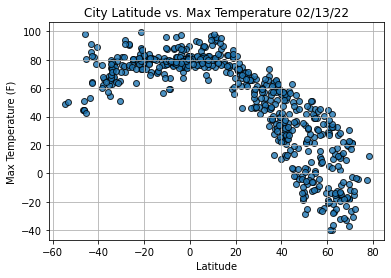

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

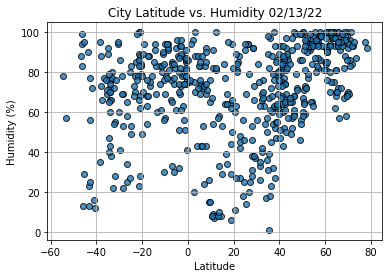

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

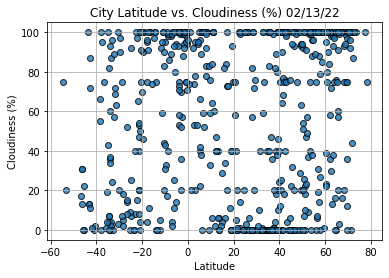

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


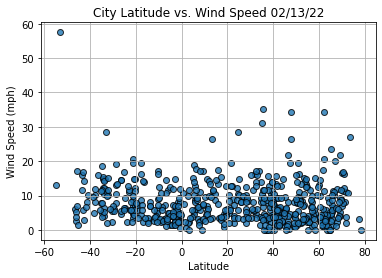

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,27.18,64,100,1.01,US,2022-02-13 16:07:48
3,Saint George,37.1041,-113.5841,58.35,32,0,0.00,US,2022-02-13 16:05:07
7,Usinsk,65.9939,57.5281,12.60,94,99,11.41,RU,2022-02-13 16:09:25
9,Riyadh,24.6877,46.7219,62.74,25,0,10.40,SA,2022-02-13 16:07:23
10,Provideniya,64.3833,-173.3000,-12.59,93,16,3.65,RU,2022-02-13 16:09:26
...,...,...,...,...,...,...,...,...,...
569,Inverbervie,56.8446,-2.2800,45.45,93,100,6.73,GB,2022-02-13 16:26:24
570,Eau Claire,44.8114,-91.4985,3.58,67,0,5.01,US,2022-02-13 16:26:24
571,Lebork,54.5392,17.7501,38.91,63,96,12.46,PL,2022-02-13 16:26:25
574,Helong,42.5397,128.9972,13.24,61,100,1.50,CN,2022-02-13 16:26:26


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

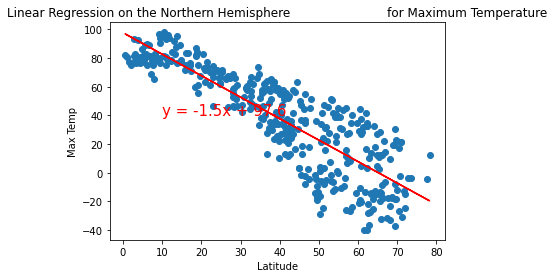

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

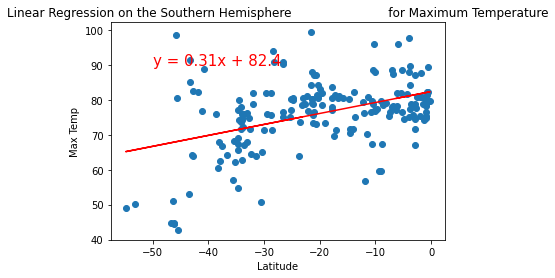

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


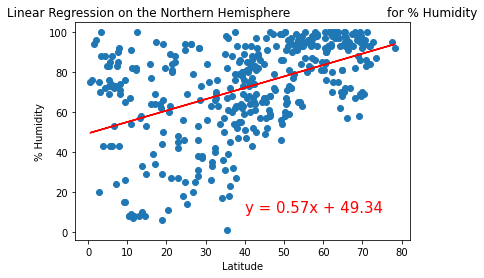

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

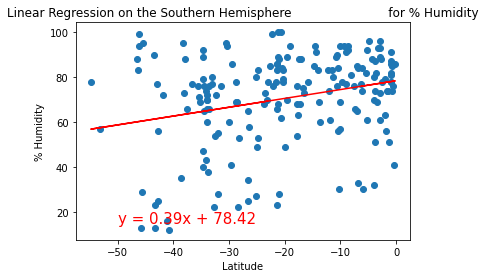

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

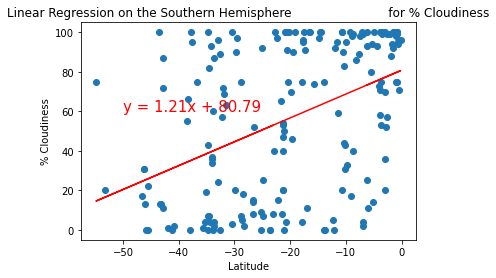

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


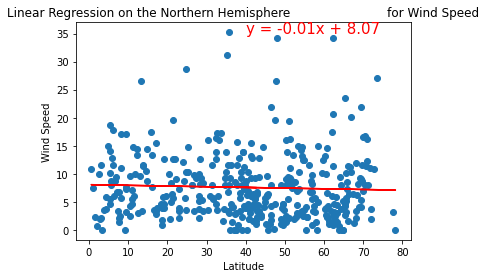

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

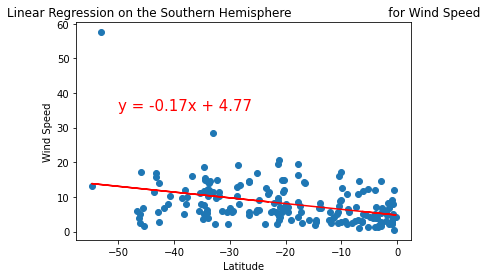

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))